In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("onlinefraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [5]:
df.shape

(192593, 11)

In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [8]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,192449
1.0,143


# **Visualize Fraud Distribution**

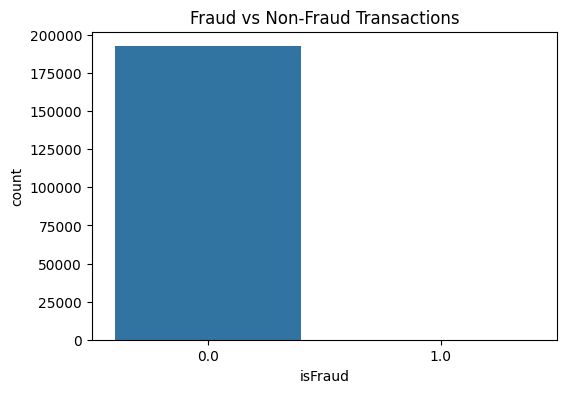

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x="isFraud",data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

# **Transaction Type Distribution**

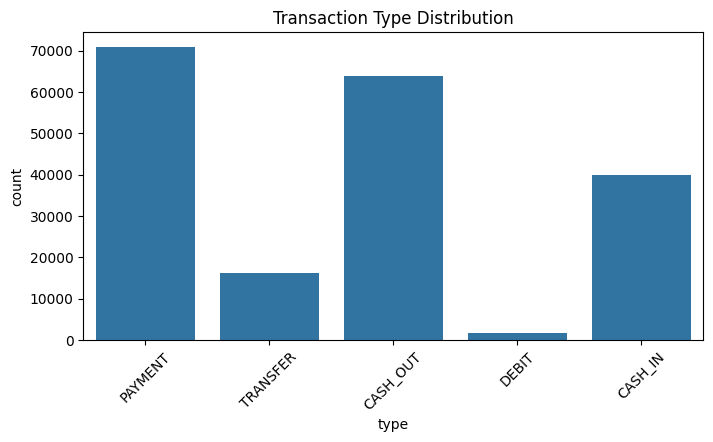

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x="type",data=df)
plt.title("Transaction Type Distribution")
plt.xticks(rotation=45)
plt.show()

# **Fraud by Transaction Type**

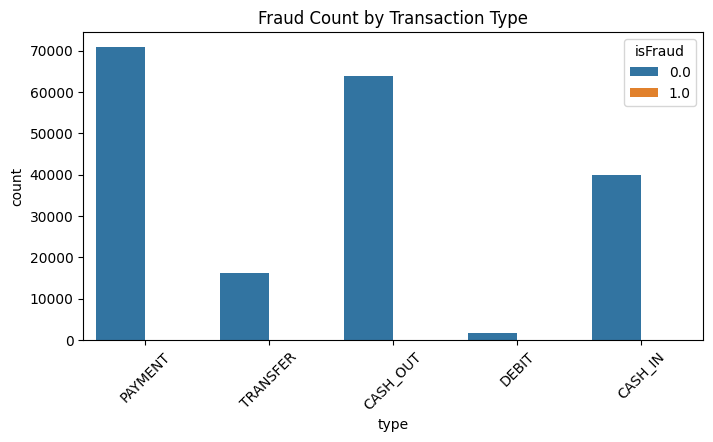

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x="type",hue='isFraud',data=df)
plt.title("Fraud Count by Transaction Type")
plt.xticks(rotation=45)
plt.show()

# **Transaction Amount vs Fraud**

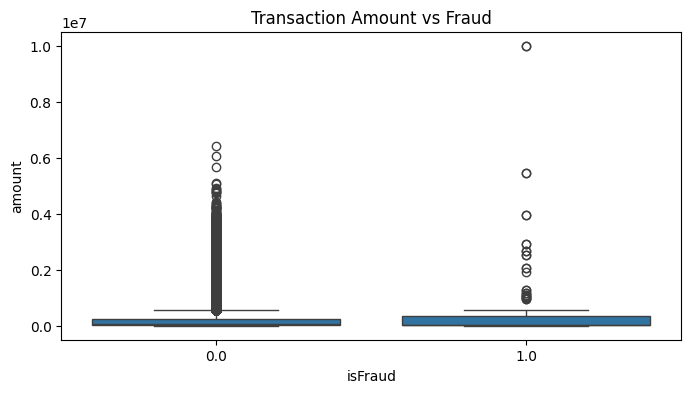

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(x='isFraud',y='amount',data=df)
plt.title("Transaction Amount vs Fraud")
plt.show()

# **Correlation Heatmap**

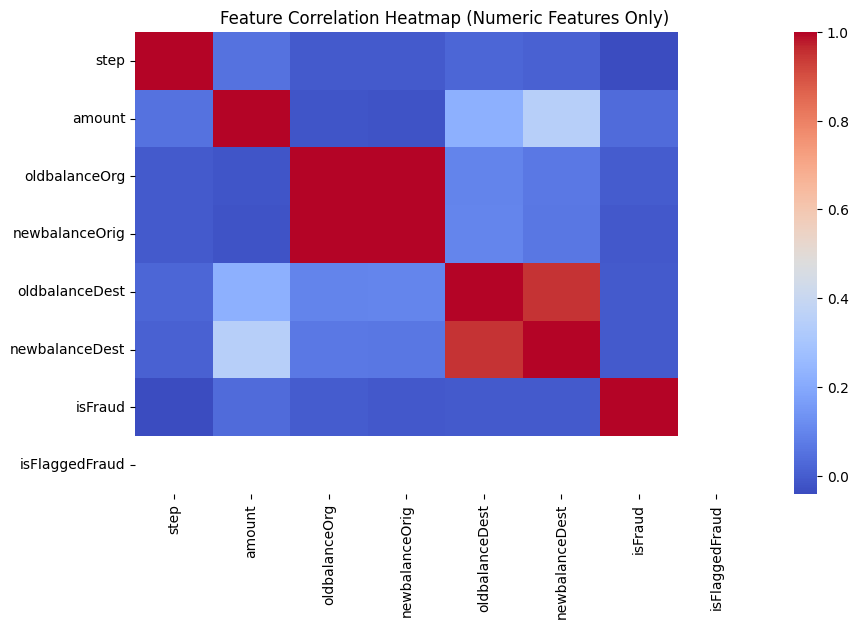

In [20]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap (Numeric Features Only)")
plt.show()


In [21]:
df=df.drop(['nameOrig', 'nameDest'],axis=1)

In [22]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0


In [23]:
# One-hot encode transaction type
df=pd.get_dummies(df,columns=['type'],drop_first=True)

In [24]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0.0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,False,False,True,False


In [36]:

y.isnull().sum()


np.int64(1)

In [37]:
df[df['isFraud'].isnull()].head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
192592,13,2.0,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [38]:
df = df.dropna(subset=['isFraud'])

In [39]:
X=df.drop('isFraud',axis=1)
y=df['isFraud']

In [43]:
print("Nan in y: ",X.isnull().sum().sum())
print("Nan in X: ",y.isnull().sum().sum())

Nan in y:  0
Nan in X:  0


# **Train-Test Split**


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [46]:
from sklearn.linear_model import LogisticRegression

In [48]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [50]:
lr_model=LogisticRegression(max_iter=1000,n_jobs=-1)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [51]:
y_predict_lr=lr_model.predict(X_test)

In [53]:
accuracy=accuracy_score(y_test,y_predict_lr)
accuracy

0.9993509696513408

In [59]:
print("accuracy = ",accuracy_score(y_test,y_predict_lr))
print("precision = ",precision_score(y_test,y_predict_lr))
print("Recall = ",recall_score(y_test,y_predict_lr))
print("f1 score = ",f1_score(y_test,y_predict_lr))

accuracy =  0.9993509696513408
precision =  1.0
Recall =  0.13793103448275862
f1 score =  0.24242424242424243


In [56]:
cm=confusion_matrix(y_test,y_predict_lr)
cm

array([[38490,     0],
       [   25,     4]])

In [58]:
print(classification_report(y_test, y_predict_lr))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38490
         1.0       1.00      0.14      0.24        29

    accuracy                           1.00     38519
   macro avg       1.00      0.57      0.62     38519
weighted avg       1.00      1.00      1.00     38519



# **Random Forest Classifier**

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [66]:

y_pred_rf = rf_model.predict(X_test)


In [67]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf


0.9994028920792336

In [68]:
print("Acuuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1-score :", f1_score(y_test, y_pred_rf))


Acuuracy: 0.9994028920792336
Precision: 0.875
Recall   : 0.2413793103448276
F1-score : 0.3783783783783784


In [69]:
cm=confusion_matrix(y_test, y_pred_rf)
cm

array([[38489,     1],
       [   22,     7]])

In [70]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38490
         1.0       0.88      0.24      0.38        29

    accuracy                           1.00     38519
   macro avg       0.94      0.62      0.69     38519
weighted avg       1.00      1.00      1.00     38519



# **XGBoost Classifier**

In [71]:
!pip install xgboost

In [72]:
from xgboost import XGBClassifier

In [75]:
scale_pos_weight=(y_train==0).sum()/(y_train==1).sum()
scale_pos_weight

np.float64(1350.517543859649)

In [76]:
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)


xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, ...)

In [77]:
y_pred_xgb = xgb_model.predict(X_test)

In [78]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb

0.9995846205768582

In [79]:
print("Accuracy :",accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1-score :", f1_score(y_test, y_pred_xgb))


Accuracy : 0.9995846205768582
Precision: 0.7407407407407407
Recall   : 0.6896551724137931
F1-score : 0.7142857142857143


In [80]:
cm=confusion_matrix(y_test, y_pred_xgb)
cm

array([[38483,     7],
       [    9,    20]])

In [81]:
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38490
         1.0       0.74      0.69      0.71        29

    accuracy                           1.00     38519
   macro avg       0.87      0.84      0.86     38519
weighted avg       1.00      1.00      1.00     38519



**XGBoost was selected as the final model because it handled class imbalance effectively and focused on hard-to-classify fraud cases, achieving the best balance between accuracy, recall, and F1-score.**

In [82]:
import joblib

In [83]:
joblib.dump(xgb_model,"fraud_detection_xgboost.pkl")

['fraud_detection_xgboost.pkl']

In [84]:
from google.colab import files

In [85]:
files.download("fraud_detection_xgboost.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>